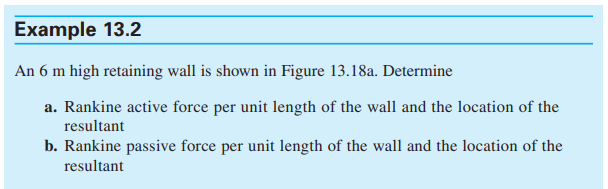

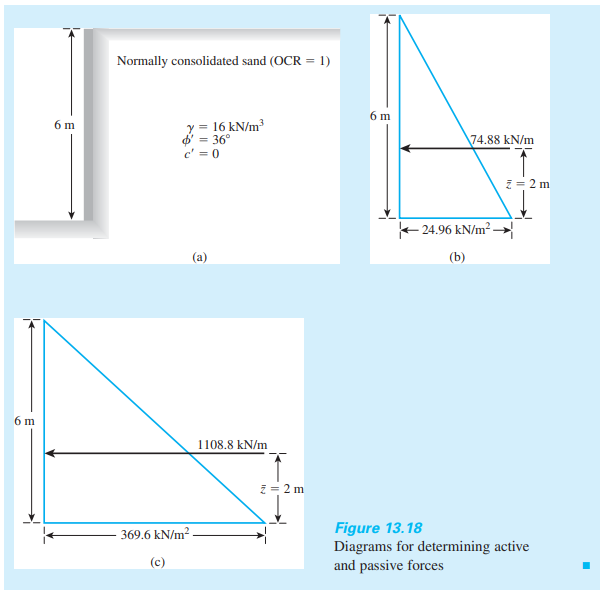

In [1]:
# Import pandas for use of dataframes
import pandas as pd

# Import the SoilProfile class from geotechpy to calculate the total and effective stresses
from geotechpy.soil_profile import SoilProfile

# Import the LateralEarthPressure class from geotechpy to calculate the lateral earth pressure
from geotechpy.lateral_earth_pressure import LateralEarthPressure

# Import the 
from geotechpy.constants import get_constants

# Show all columns of the dataframes
pd.set_option("display.max_columns", None)

In [2]:
# Read the soil profile data from a CSV file and store it in a dataframe

sp_df = pd.read_csv("soil_profile_Das_13_2.csv")

sp_df

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion
0,1,100,94,Sand,16,16,36,0,NaN,NaN


In [3]:
# Declare the variables needed for the SoilProfile and LateralEarthPressure classes

# The SoilProfile class needs the sp_df dataframe, uniform surcharge, water surface elevation, and the units system used.

# The LateralEarthPressure class needs the soil_profile.dataframe, backfill slope angle, wall back face agle from vertical, 
# wall interface friction angle, and the units system used.

# The calculations for at-rest earth pressures require input for OCR.

# Declare the uniform surcharge in kPa or psf
uniform_surcharge = 0

# Declare the water surface elevation in m or ft
water_surface_elevation = 94

# Declare the backfill slope angle in degrees
backfill_slope_angle = 0

# Declare the wall back face angle from vertical in degrees
wall_back_face_angle = 0

# Declare the wall interface friction angle in degrees
wall_interface_friction_angle = 0

# Declare the OCR for at-rest earth pressures
OCR = 1

# Declare the units system used, metric or imperial
units = "metric"



In [4]:
# Create a SoilProfile object from the dataframe
soil_profile = SoilProfile(sp_df, uniform_surcharge, water_surface_elevation, units)

# Calculate the total and effective stresses using the calculate_all() method
soil_profile.calculate_all()

# Display the soil profile dataframe
soil_profile.dataframe

# Note that the layer containing the water surface elevation has been split into two layers, one above and one below the water surface elevation.

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress
0,1,100,94,Sand,16,16,36,0,NaN,NaN,16.0,16,6,0,96.0,48.0,0.0,0.0,0.0,96.0,48.0


In [5]:
# Create a LateralEarthPressure object from the soil_profile object
lateral_earth_pressure = LateralEarthPressure(soil_profile.dataframe, backfill_slope_angle, wall_back_face_angle, wall_interface_friction_angle, units)

# Calculate the active lateral earth coefficient, pressure and force using the calculate_active_all() method.
lateral_earth_pressure.calculate_rankine_active_all()

# Display the lateral earth pressure dataframe
lateral_earth_pressure.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,active_coefficient,top_active_pressure,bottom_active_pressure,active_force,active_force_elevation
0,1,100,94,Sand,16,16,36,0,NaN,NaN,16.0,16,6,0,96.0,48.0,0.0,0.0,0.0,96.0,48.0,0.26,0.0,25.0,75.0,96.0


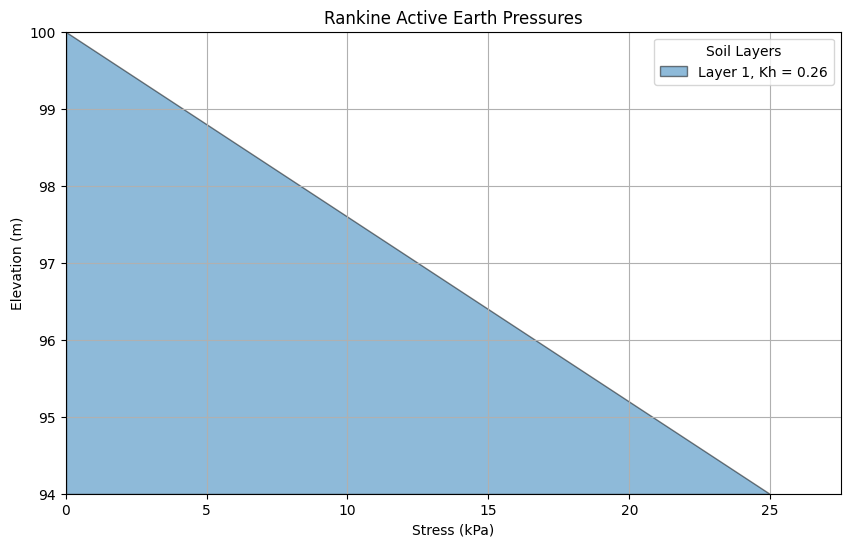

In [6]:
# Plot the lateral earth pressure diagram using the 
lateral_earth_pressure.plot_rankine_active_pressures()

In [7]:
lateral_earth_pressure.calculate_rankine_passive_all()

lateral_earth_pressure.dataframe

,layer_id,top_elevation,bottom_elevation,soil_classification,moist_unit_weight,saturated_unit_weight,drained_friction_angle,drained_cohesion,undrained_friction_angle,undrained_cohesion,effective_unit_weight,total_unit_weight,layer_height,top_effective_stress,bottom_effective_stress,middle_effective_stress,top_water_pressure,bottom_water_pressure,top_total_stress,bottom_total_stress,middle_total_stress,active_coefficient,top_active_pressure,bottom_active_pressure,active_force,active_force_elevation,passive_coefficient,top_passive_pressure,bottom_passive_pressure,passive_force,passive_force_location
0,1,100,94,Sand,16,16,36,0,NaN,NaN,16.0,16,6,0,96.0,48.0,0.0,0.0,0.0,96.0,48.0,0.26,0.0,25.0,75.0,96.0,3.85,0.0,369.6,1108.8,96.0


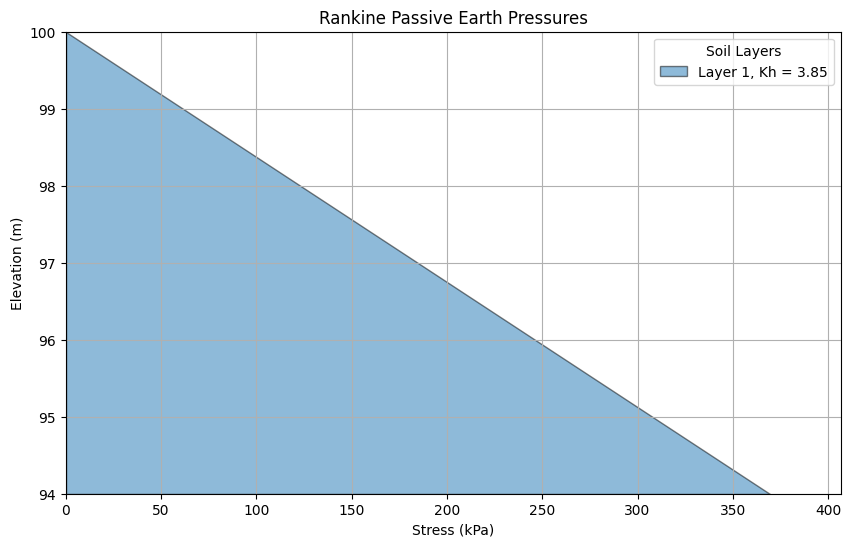

In [8]:
lateral_earth_pressure.plot_rankine_passive_pressures()

In [9]:
# Calculate the total active force as the sum of the active force values
total_active_force = lateral_earth_pressure.dataframe["active_force"].sum()

# Display the total active force
force_units = get_constants(units)["force_units"]
print("Total active force: {:.1f} {} per unit width of wall".format(total_active_force, force_units))


Total active force: 75.0 kN per unit width of wall


In [10]:
# Calculate the total passive force as the sum of the passive force values
total_passive_force = lateral_earth_pressure.dataframe["passive_force"].sum()

# Display the total passive force
force_units = get_constants(units)["force_units"]
print("Total passive force: {:.1f} {} per unit width of wall".format(total_passive_force, force_units))


Total passive force: 1108.8 kN per unit width of wall
